<a href="https://colab.research.google.com/github/SairamTadepalli19/Day12/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
#Import the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Import the dataset

data = pd.read_csv("/content/black_f.csv")

In [3]:
#Check the head of the dataset

data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
#Shape of the dataset

data.shape

(550068, 12)

In [5]:
#Check the info of the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [6]:
#Description

data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [7]:
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

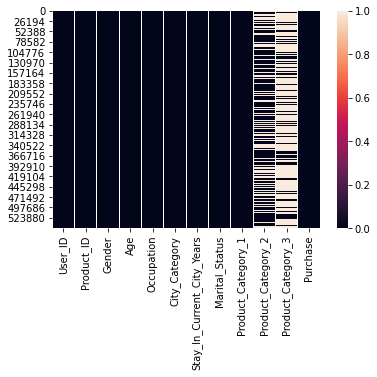

In [10]:
#Plot the heat map related to null variables

sns.heatmap(data.isnull())

In [11]:
#Drop the columns which are not required

data.drop(['Product_Category_3', 'User_ID'], axis= 1, inplace = True)

In [12]:
data.columns

Index(['Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Purchase'],
      dtype='object')

In [13]:
data['Product_Category_2'].value_counts()

8.0     64088
14.0    55108
2.0     49217
16.0    43255
15.0    37855
5.0     26235
4.0     25677
6.0     16466
11.0    14134
17.0    13320
13.0    10531
9.0      5693
12.0     5528
10.0     3043
3.0      2884
18.0     2770
7.0       626
Name: Product_Category_2, dtype: int64

In [14]:
#Fillna with 0 value

data['Product_Category_2'].fillna(0, inplace = True)

In [15]:
data['Product_Category_2'].value_counts()

0.0     173638
8.0      64088
14.0     55108
2.0      49217
16.0     43255
15.0     37855
5.0      26235
4.0      25677
6.0      16466
11.0     14134
17.0     13320
13.0     10531
9.0       5693
12.0      5528
10.0      3043
3.0       2884
18.0      2770
7.0        626
Name: Product_Category_2, dtype: int64

In [16]:
data.isnull().sum()

Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Purchase                      0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


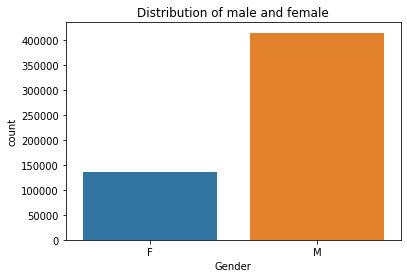

In [17]:
#Plot a countplot Based on gender

gender = sns.countplot(data['Gender'])
gender.set_title("Distribution of male and female")

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


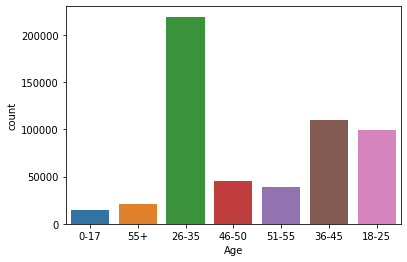

In [18]:
sns.countplot(data['Age'])

In [19]:
data['Occupation'].value_counts()

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

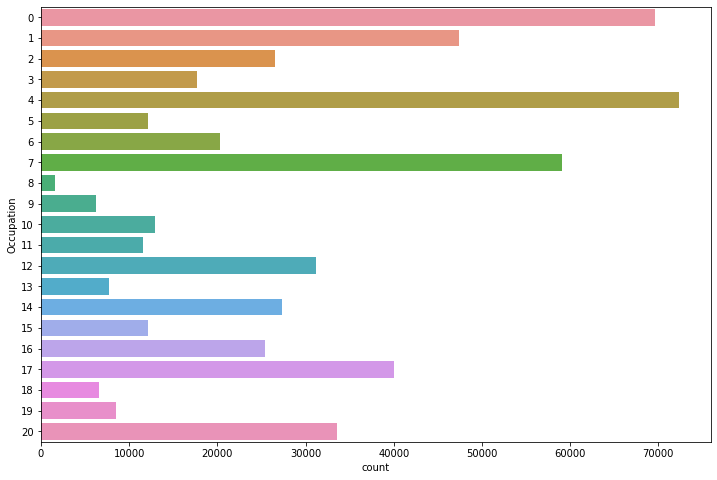

In [20]:
plt.figure(figsize = (12,8))

sns.countplot(y = data['Occupation'])

In [21]:
#Label Encoding

#We are going to implement label encoding for the Prodduct ID and age

from sklearn.preprocessing import LabelEncoder

le_encoder = LabelEncoder()

# Need to convert the existing two types of columns into proper manner

data['Product_ID'] = le_encoder.fit_transform(data['Product_ID'])

data['Age'] = le_encoder.fit_transform(data['Age'])

In [22]:
data.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,672,F,0,10,A,2,0,3,0.0,8370
1,2376,F,0,10,A,2,0,1,6.0,15200
2,852,F,0,10,A,2,0,12,0.0,1422
3,828,F,0,10,A,2,0,12,14.0,1057
4,2734,M,6,16,C,4+,0,8,0.0,7969


In [23]:
data['City_Category'] = le_encoder.fit_transform(data['City_Category'])

data['Stay_In_Current_City_Years'] = le_encoder.fit_transform(data['Stay_In_Current_City_Years'])

In [24]:
data.head(20)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,672,F,0,10,0,2,0,3,0.0,8370
1,2376,F,0,10,0,2,0,1,6.0,15200
2,852,F,0,10,0,2,0,12,0.0,1422
3,828,F,0,10,0,2,0,12,14.0,1057
4,2734,M,6,16,2,4,0,8,0.0,7969
5,1831,M,2,15,0,3,0,1,2.0,15227
6,1745,M,4,7,1,2,1,1,8.0,19215
7,3320,M,4,7,1,2,1,1,15.0,15854
8,3604,M,4,7,1,2,1,1,16.0,15686
9,2631,M,2,20,0,1,1,8,0.0,7871


In [25]:
#Age column is converted using map() function

data['Gender'] = data['Gender'].map({'F': 0, 'M': 1})

In [26]:
data.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,672,0,0,10,0,2,0,3,0.0,8370
1,2376,0,0,10,0,2,0,1,6.0,15200
2,852,0,0,10,0,2,0,12,0.0,1422
3,828,0,0,10,0,2,0,12,14.0,1057
4,2734,1,6,16,2,4,0,8,0.0,7969


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  550068 non-null  int64  
 1   Gender                      550068 non-null  int64  
 2   Age                         550068 non-null  int64  
 3   Occupation                  550068 non-null  int64  
 4   City_Category               550068 non-null  int64  
 5   Stay_In_Current_City_Years  550068 non-null  int64  
 6   Marital_Status              550068 non-null  int64  
 7   Product_Category_1          550068 non-null  int64  
 8   Product_Category_2          550068 non-null  float64
 9   Purchase                    550068 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 42.0 MB


In [28]:
x = data.drop('Gender', axis = 1)

y = data['Gender']

In [29]:
#SPlit the dataset into training and testing sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)

In [32]:
#Build teh KNN Classifier 

from sklearn.neighbors import KNeighborsClassifier

In [33]:
k_model = KNeighborsClassifier()

In [34]:
k_model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [42]:
tr_pred = k_model.predict(x_train)
ts_pred = k_model.predict(x_test)

In [43]:
#Get the accuracy score of both training and testing

from sklearn.metrics import accuracy_score, confusion_matrix

print("Training Accuracy:", accuracy_score(y_train, tr_pred))
print("Testing Accuracy:", accuracy_score(y_test, ts_pred))

Training Accuracy: 0.7887972117689529
Testing Accuracy: 0.7094066815738603


In [53]:
tr_acc = []
ts_acc = []
for i in range(5,17,2):
  k_model = KNeighborsClassifier(n_neighbors=i)
  k_model.fit(x_train,y_train)

  tr_pred = k_model.predict(x_train)
  ts_pred = k_model.predict(x_test)

  tr_acc.append(accuracy_score(y_train,tr_pred))
  ts_acc.append(accuracy_score(y_test,ts_pred))

In [54]:
tr_acc

[0.7887972117689529,
 0.7754585803810964,
 0.7680439011341472,
 0.7639197292798022,
 0.761252522419341,
 0.7595981789236119]

In [55]:
ts_acc

[0.7094066815738603,
 0.72205961665485,
 0.7297010683488768,
 0.7354942704261882,
 0.7396452572702868,
 0.7428933287278588]

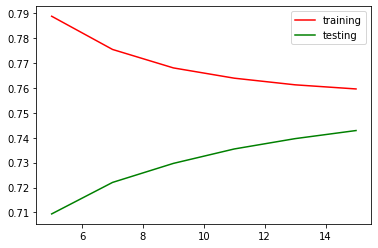

In [56]:
x_ = [x for x in range(5,17,2)]
plt.plot(x_,tr_acc,label='training',color='red')
plt.plot(x_,ts_acc,label='testing',color='green')
plt.legend()
plt.show()